<a href="https://colab.research.google.com/github/dkant000/ML_PROJECT/blob/master/online_shoppers_purchase_intention%5BFINAL_EXEC%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OneHotEncoder
enco = OneHotEncoder()
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.decomposition import pca
from plotnine.data import economics
from pandas import DataFrame
from plotnine import ggplot, aes, geom_line
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fr

In [5]:
data = pd.read_csv('dataset.csv',index_col=None)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Descriptive Analysis

In [6]:
# description of Administrative, Informational, ProductRelated,ExitRates, PageValues, SpecialDay
data[['Administrative','Informational','ProductRelated','ExitRates','PageValues','SpecialDay']].describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,0.043073,5.889258,0.061427
std,3.321784,1.270156,44.475503,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.014286,0.000000,0.000000
50%,1.000000,0.000000,18.000000,0.025156,0.000000,0.000000
75%,4.000000,0.000000,38.000000,0.050000,0.000000,0.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000


In [7]:
# description of Month, OperatingSystems, Browser, Region, TrafficType
data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']].describe()

,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.124006,2.357097,3.147364,4.069586
std,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000
75%,3.000000,2.000000,4.000000,4.000000
max,8.000000,13.000000,9.000000,20.000000


In [8]:
# data.info()
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
# Month is a categorical variable , so converting them using label encoding 

# data['Month']= label_encoder.fit_transform(data['Month']) 
# data['OperatingSystems'] = data['OperatingSystems'].astype('category')
# data['Browser'] = data['Browser'].astype('category')
data['Browser']=data['Browser'].astype('int')
data['OperatingSystems']=data['OperatingSystems'].astype('int')
# Weekend and Revenue feature is of type bool, so converting that into integer 
data['Weekend'] = data['Weekend'].astype(np.int)
data['Revenue'] = data['Revenue'].astype(np.int)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


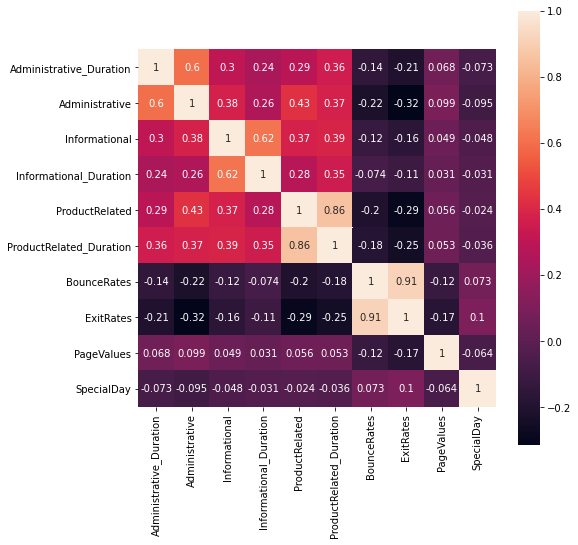

In [10]:
# coorellation between numerical features of dataset 

f,ax=plt.subplots(figsize=(8,8))
correlation=data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']].corr()
sns.heatmap(correlation,annot=True,square=True)


In [11]:
# From above coorelation, the attributes Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates
# can be removed as they have very high coorelation between them

data = data.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates'],axis=1)


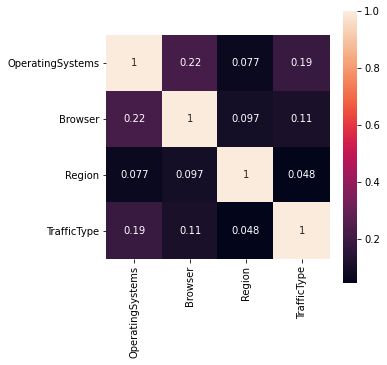

In [12]:
# coorellation between categorical features of dataset 

f,ax=plt.subplots(figsize=(5,5))
correlation=data[['OperatingSystems','Browser','Region','TrafficType']].corr()
sns.heatmap(correlation,annot=True,square=True)

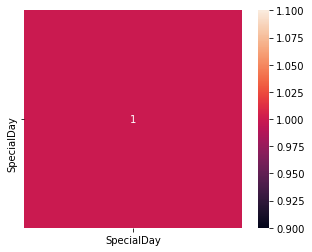

In [13]:
# coorelation between categorical feature SpecialDay anf Month of dataset
correlation1=data[['SpecialDay','Month']].corr()
sns.heatmap(correlation1,annot=True,square=True)

# Exploratory Data Analysis [EDA] 



> ***Univariate Data Analysis***



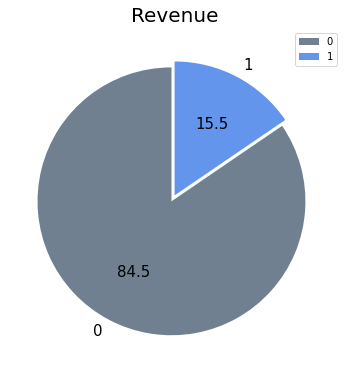

In [14]:
# Plotting a pie chart for Revenue
# Shows imbalanced data
plt.figure(figsize=(6,7))
data['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

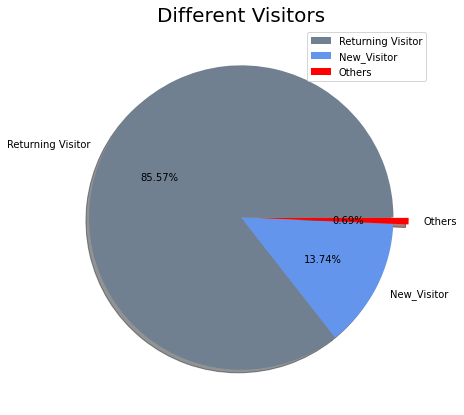

In [15]:
# plotting a pie chart for Visitors
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['slategray','cornflowerblue','red']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

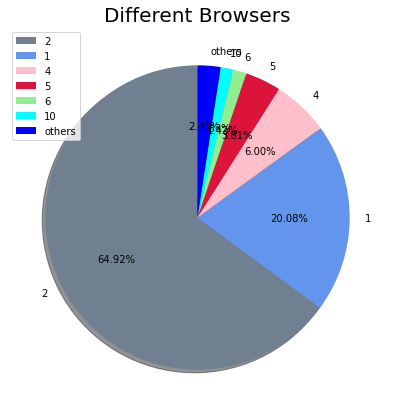

In [16]:
# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

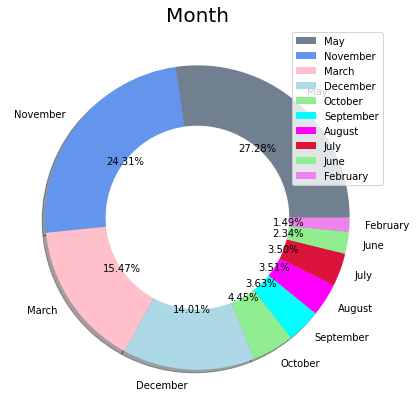

In [17]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['slategray', 'cornflowerblue', 'pink', 'lightblue', 'lightgreen', 'cyan', 'magenta', 'crimson', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [18]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

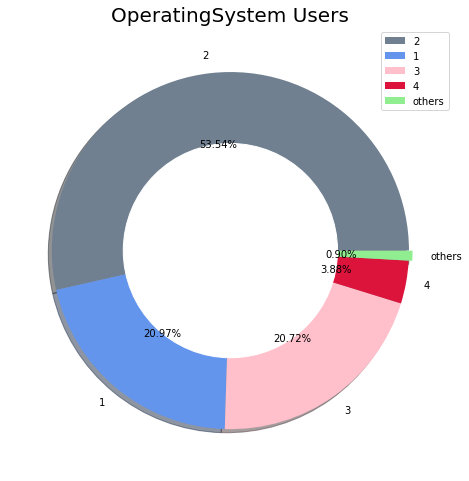

In [19]:
# plotting a pie chart for different number of OperatingSystems users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0.02]

circle = plt.Circle((0, 0), 0.6, color = 'white')
# plt.subplot(1, 2, 1)
plt.figure(figsize=(8,12))
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OperatingSystem Users', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()



> ***Bivariate Data Analysis***



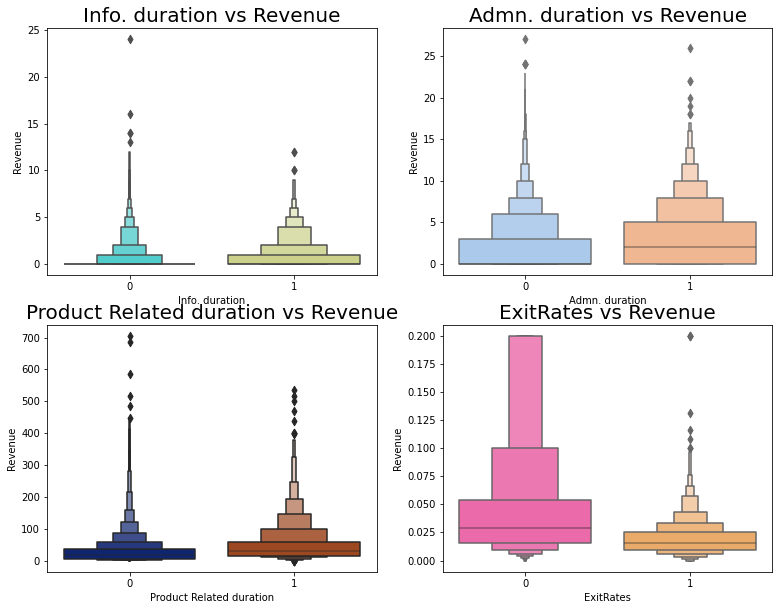

In [20]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (13, 10)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 20)
plt.xlabel('Info. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 20)
plt.xlabel('Admn. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Product Related duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.show()

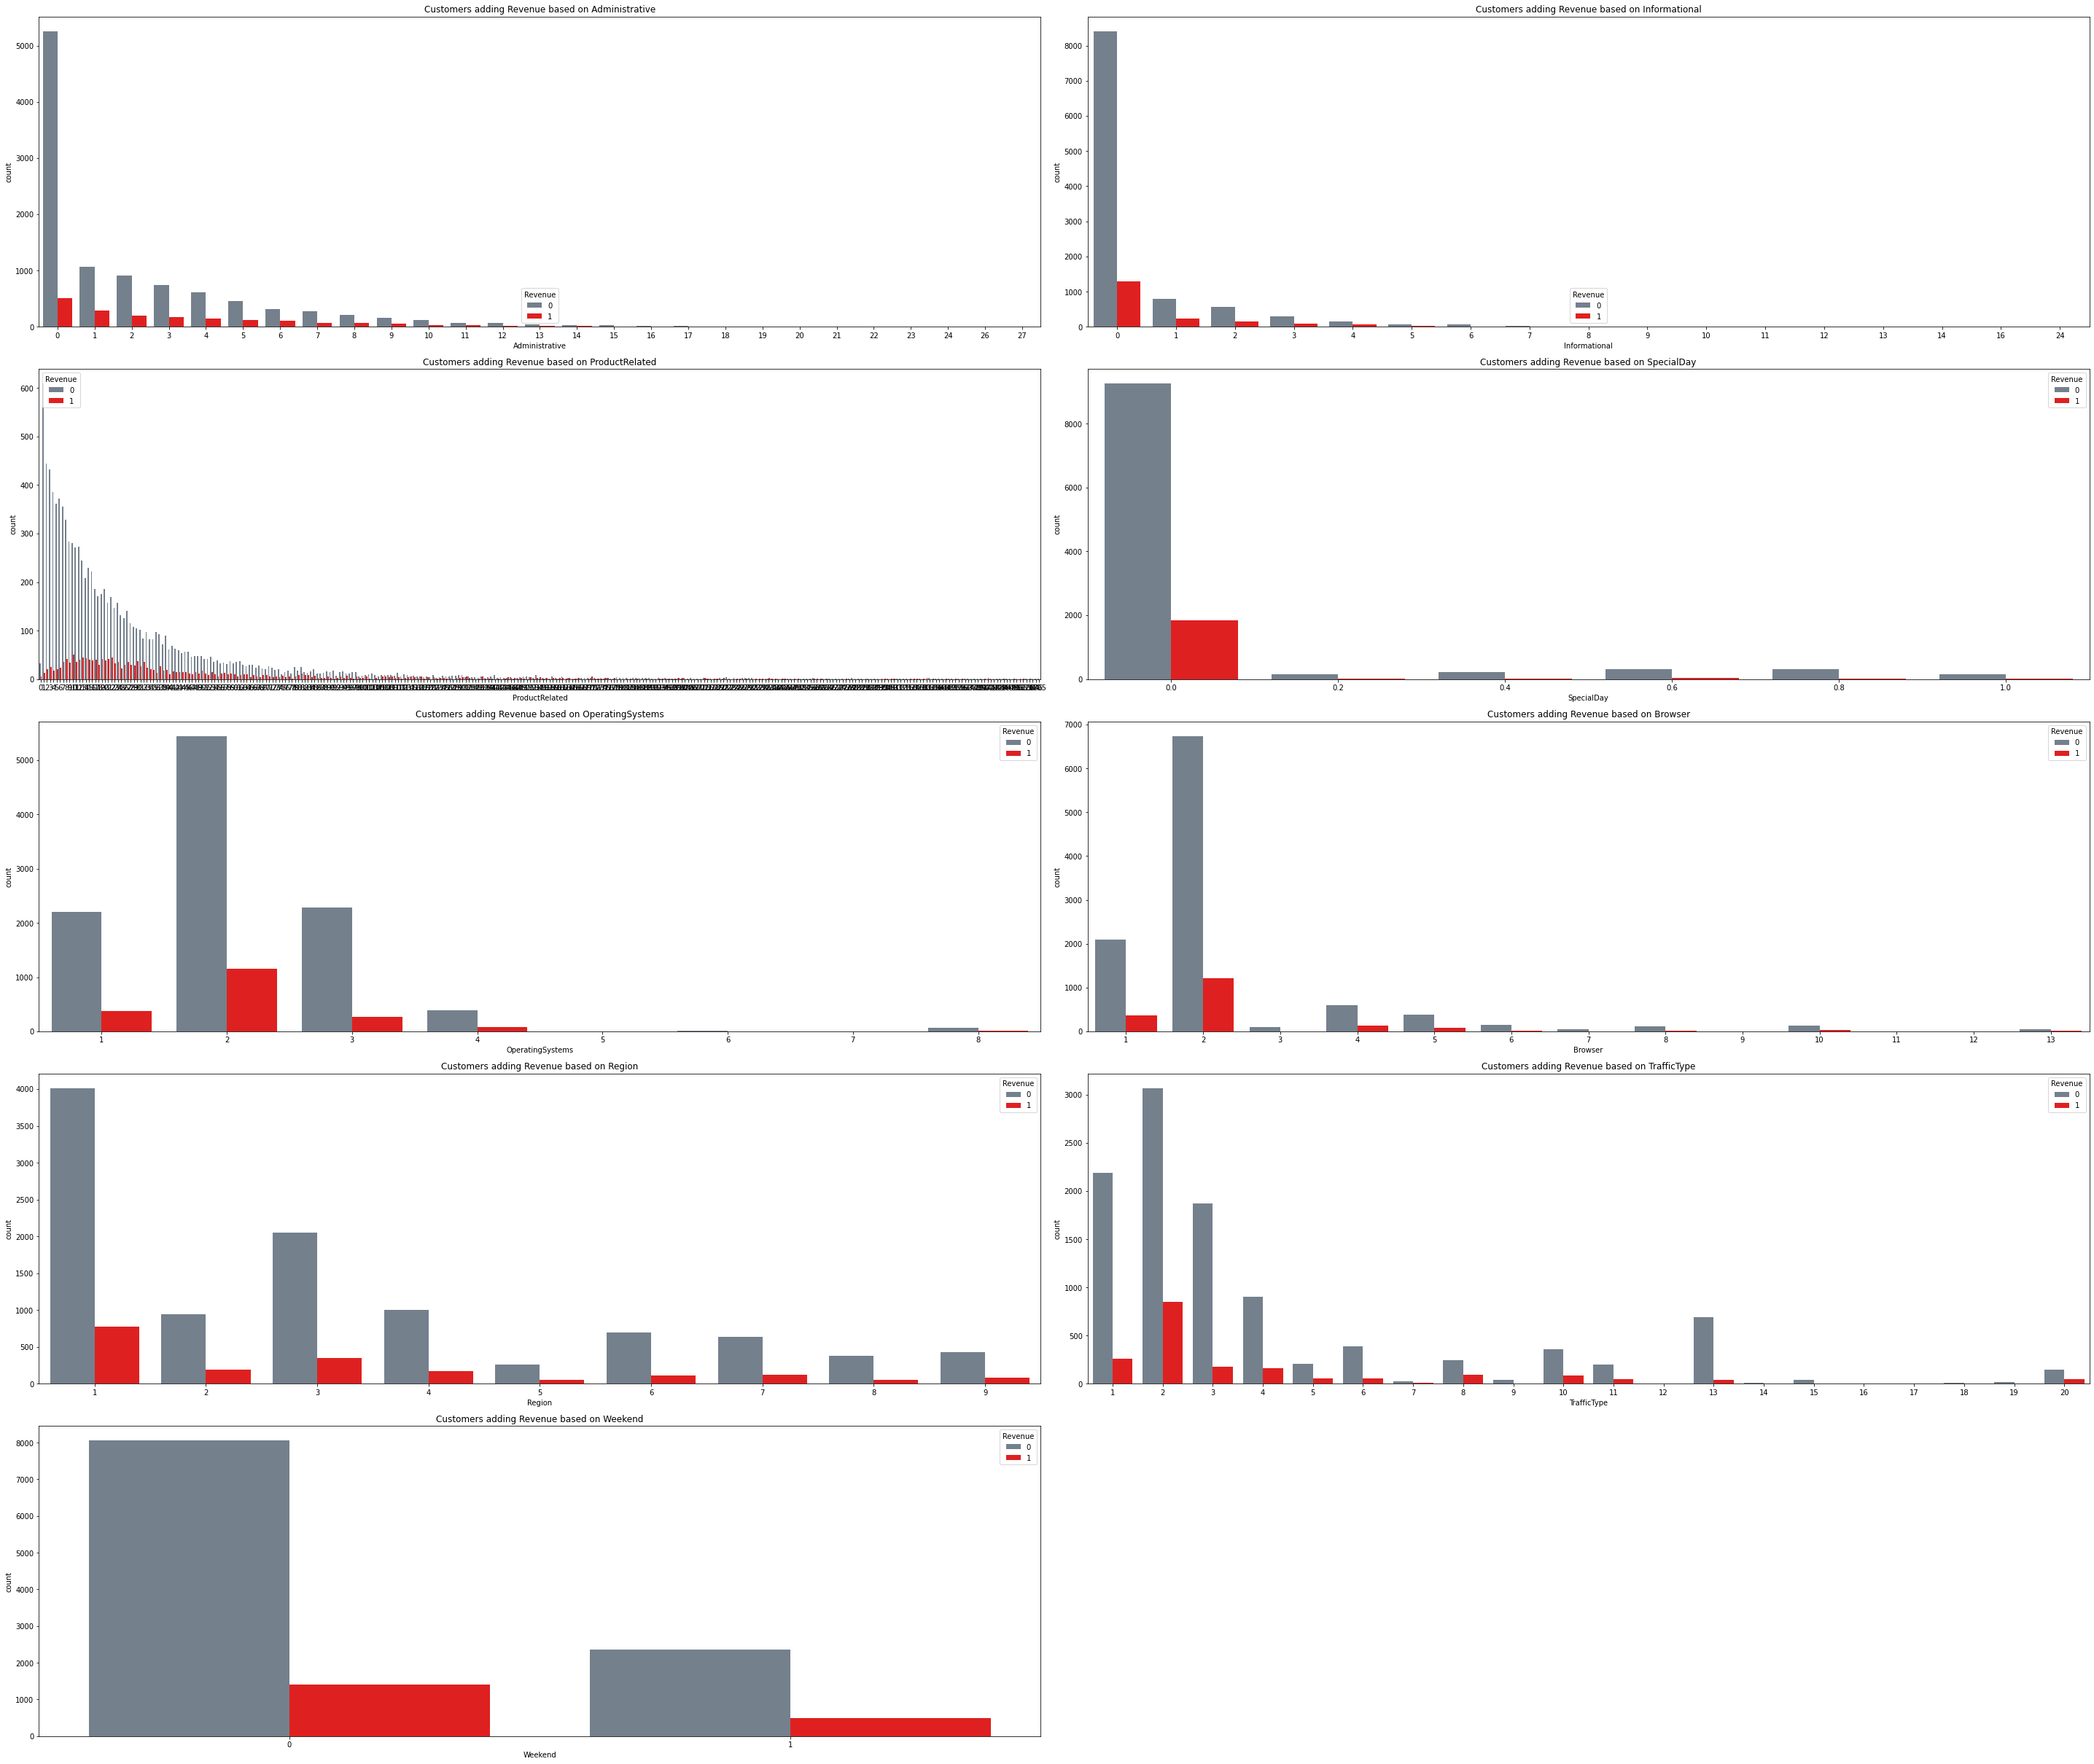

In [21]:
columns=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend']    
plt.figure(figsize=(40,40))
plot_number = 0
for i in columns:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(data[i],hue=data['Revenue'], palette= ['slategray',"red"])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

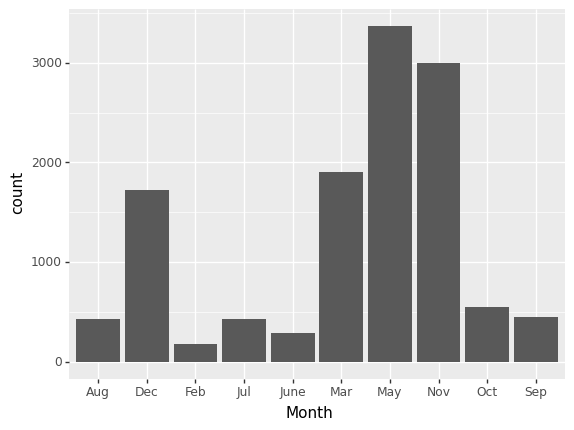

<ggplot: (8793888279437)>

In [22]:
ggplot(data, aes(x='Month', fill = 'Revenue')) + \
    geom_bar(stat = 'count')

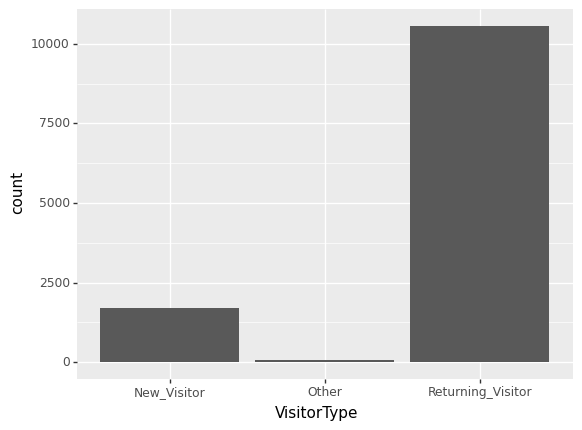

<ggplot: (8793888569471)>

In [23]:

ggplot(data, aes(x='VisitorType', fill = 'Revenue')) + \
    geom_bar(stat = 'count', )

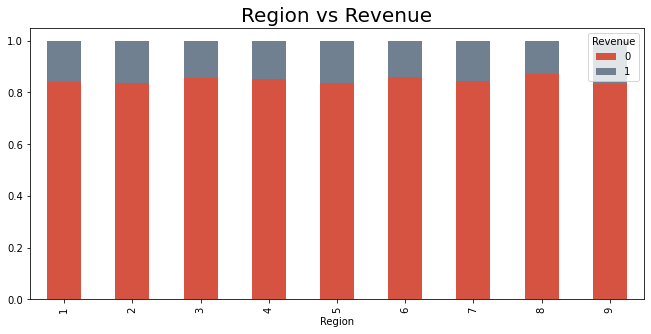

In [24]:
# f,ax=plt.subplots(figsize=(8,8))
data1 = pd.crosstab(data['Region'], data['Revenue'])
data1.div(data1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['#D75341','slategray'])
plt.title('Region vs Revenue', fontsize = 20)
plt.show()

,month,revenue_true,revenue_false,Percent_true
1,Aug,76,357,21.2885
2,Dec,216,1511,14.2952
3,Feb,3,181,1.65746
4,Jul,66,366,18.0328
5,June,29,259,11.1969
6,Mar,192,1715,11.1953
7,May,365,2999,12.1707
8,Nov,760,2238,33.9589
9,Oct,115,434,26.4977
10,Sep,86,362,23.7569


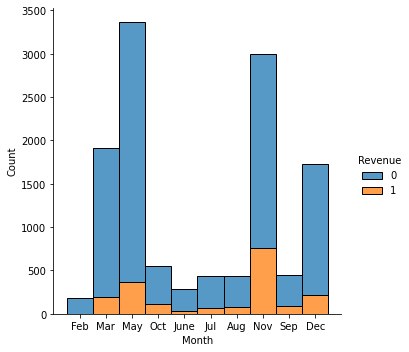

In [25]:
counts=[]
count_false = []
x = list(data['Revenue'])
y=list(data['Month'])
new_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep']
month_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep','total']
 
new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==1:
      count+=1
      # print(count)
  counts.append(count)
  X=(count)

for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
   if y[i]==new_list[j] and x[i]==0:
     count+=1
  count_false.append(count)
  X=(count)
 
ratio_list =[] 
ratio = 0
 
for i in range(len(new_list)):
  ratio = counts[i]/count_false[i]
  ratio = ratio*100
  ratio_list.append(ratio)
 
total_true = 0
total_false = 0
for i in range(0, len(counts)):
 total_true = total_true + counts[i]
# print(total_true)
 
for i in range(0, len(count_false)):
 total_false = total_false + count_false[i]
# print(total_false)
 
counts.append(total_true)
count_false.append(total_false)
ratio_list.append('')
New_list_DataFrame=DataFrame(month_list,columns=["month"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA=DataFrame(counts,columns=["revenue_true"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA_false=DataFrame(count_false,columns=["revenue_false"],index=[1,2,3,4,5,6,7,8,9,10,11])
ratio_col = DataFrame(ratio_list,columns=["Percent_true"],index=[1,2,3,4,5,6,7,8,9,10,11])
Data_con=pd.concat([New_list_DataFrame,DATA,DATA_false,ratio_col],axis="columns")
# (Data_con.style.format('${0:,.2f}')
display(Data_con)
# print(tabulate(Data_con, headers = 'keys', tablefmt = 'psql'))
 
print('\n')
sns.displot(data, x="Month", hue="Revenue" ,multiple = "stack")

In [26]:
data['Month']

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12330, dtype: object

In [27]:
# month label encoded
data['Month']= label_encoder.fit_transform(data['Month']) 

# Data Pre-processing

In [28]:
# Spliting the dataset into 2 forms, one with revenue and other with rest 
y = data['Revenue']
x = data.drop('Revenue',axis=1)


In [29]:
x

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,1,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,0
1,0,0,2,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,0
2,0,0,1,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,0
3,0,0,2,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,0
4,0,0,10,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,1,4,6,1,1,Returning_Visitor,1
12326,0,0,5,0.021333,0.000000,0.0,7,3,2,1,8,Returning_Visitor,1
12327,0,0,6,0.086667,0.000000,0.0,7,3,2,1,13,Returning_Visitor,1
12328,4,0,15,0.021053,0.000000,0.0,7,2,2,3,11,Returning_Visitor,0


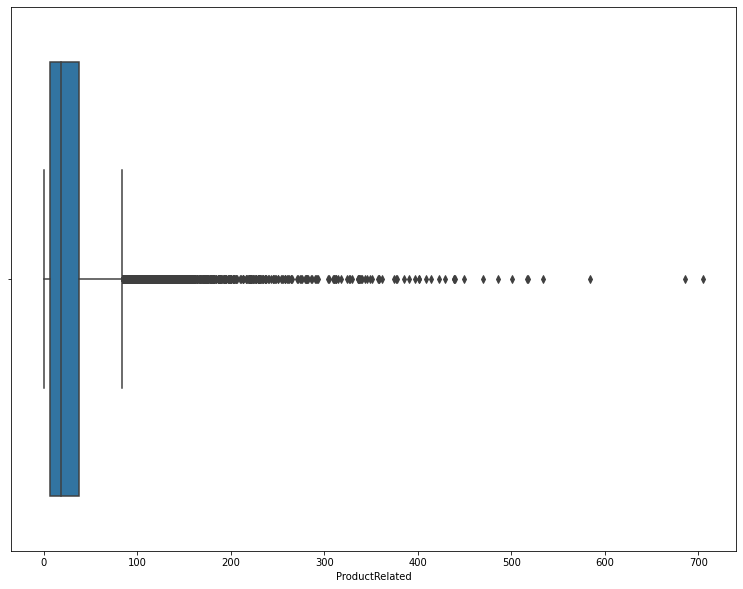

In [30]:
# outliers
# sns.boxplot(x=data['Administrative'])
sns.boxplot(x=data['ProductRelated'])
# sns.boxplot(x=data['ExitRates'])
# sns.boxplot(x=data['TrafficType'])

In [31]:
# Use get_dummies to split attribute VisitorType into different features
x = pd.get_dummies(x)
x
# data.info()
list (data.columns)

['Administrative',
 'Informational',
 'ProductRelated',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']



> ***Scalling***



In [32]:
# min max scale

cols_to_scale = ['Administrative',
 'Informational',
 'ProductRelated',
 'ExitRates',
 'PageValues',
 'SpecialDay',]
# from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [33]:
# Now, remove attribute VisitorType_Other as it will not affect our dataset

# x = x.drop(['VisitorType_Other'], axis=1)


# Model Fitting




> SMOTE



In [34]:
#define COnfusion matrix

def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  plt.figure(figsize=(4,4))
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
print("shape of x before",x.shape)
print("shape of y before",y.shape)
smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(x,y);
print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)


shape of x before (12330, 15)
shape of y before (12330,)
Shape of x_smote : (20844, 15)
Shape of y_smote : (20844,)


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30)
print("x_train Shape :", x_train.shape)
print("x_test Shape :", x_test.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)
# print(x_smote.shape)
# print(y_smote.shape)

x_train Shape : (14590, 15)
x_test Shape : (6254, 15)
y_train Shape : (14590,)
y_test Shape : (6254,)


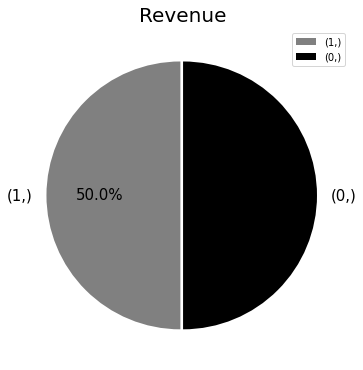

In [37]:
# Plotting a pie chart for Revenue after balancing the dataset
 
list_Revenue=pd.DataFrame(y_smote)
plt.figure(figsize=(6,7))
list_Revenue.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 15},startangle=90,explode =(0.02,0),colors=['grey','black'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()



> ***1. Random Forest***



Training Accuracy : 0.9248800548320768
Testing Accuracy : 0.9125359769747362
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3079
           1       0.91      0.92      0.91      3175

    accuracy                           0.91      6254
   macro avg       0.91      0.91      0.91      6254
weighted avg       0.91      0.91      0.91      6254



<Figure size 288x288 with 0 Axes>

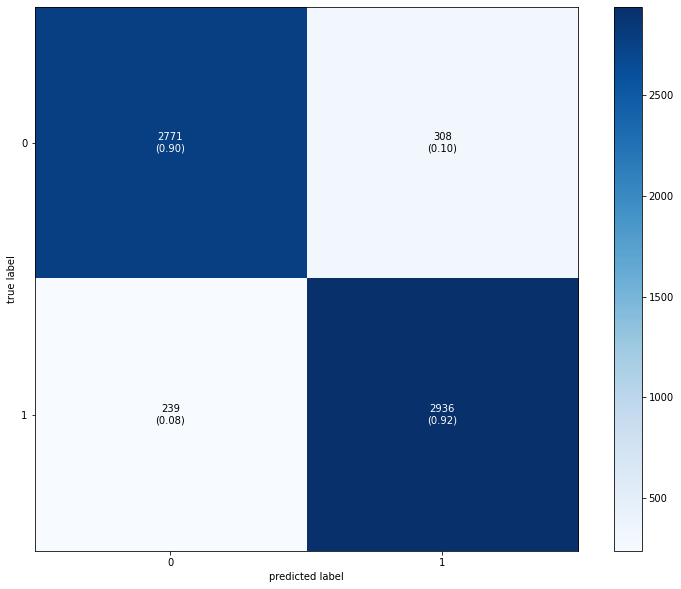

In [38]:
# Creating Random Forest Classifier

model = RandomForestClassifier(min_samples_leaf=20,min_samples_split=5,random_state=100)
model.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))
# print(cr)
# confusion matrix

ConfusionMatrix(y_test,y_pred)

In [39]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=100), {
    'min_samples_leaf': [20,25,30,35],
    'min_samples_split': [5,10,15,20]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
# clf.cv_results_
model_data=pd.DataFrame(clf.cv_results_)
print(model_data[['param_min_samples_leaf','param_min_samples_split','mean_test_score']])

print('the best score is : ',clf.best_score_)
print('The best fitted parameters for decision tree classifier is :',clf.best_params_)

   param_min_samples_leaf param_min_samples_split  mean_test_score
0                      20                       5         0.962904
1                      20                      10         0.962904
2                      20                      15         0.962904
3                      20                      20         0.962904
4                      25                       5         0.959867
5                      25                      10         0.959867
6                      25                      15         0.959867
7                      25                      20         0.959867
8                      30                       5         0.957948
9                      30                      10         0.957948
10                     30                      15         0.957948
11                     30                      20         0.957948
12                     35                       5         0.956029
13                     35                      10         0.95



> ***2. Decision Tree***



Training Accuracy : 0.9305688827964359
Testing Accuracy : 0.9003837543971858
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3079
           1       0.91      0.90      0.90      3175

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



<Figure size 288x288 with 0 Axes>

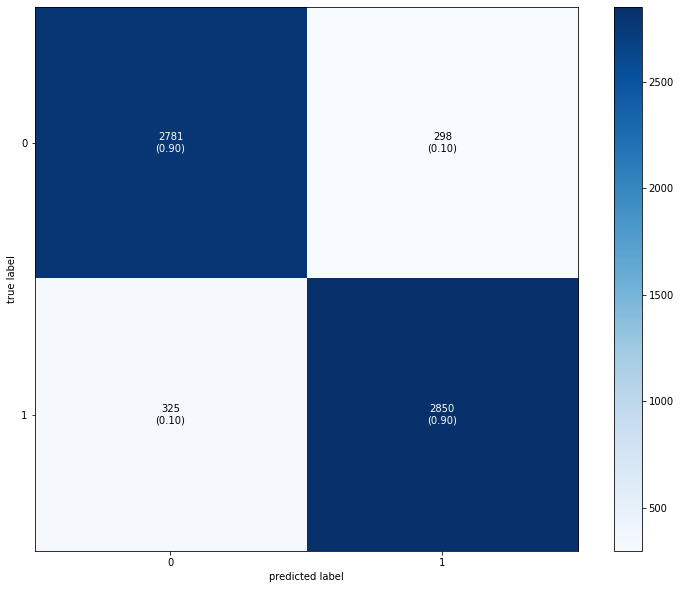

In [40]:
# Creating Decision Tree Classifier

DTC = DecisionTreeClassifier(min_samples_leaf=20,min_samples_split=5,random_state=75,)
DTC.fit(x_train, y_train)
# Predicting dataset response
y_pred=DTC.predict(x_test)
# Evaluate and display Training and Testing Acvuracy
print("Training Accuracy :", DTC.score(x_train, y_train))
print("Testing Accuracy :", DTC.score(x_test, y_test))
# Display Classification Report
print(classification_report(y_test, y_pred))
# Confusion matrix call
ConfusionMatrix(y_test,y_pred)

In [41]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_leaf': [20,25,30,],
    'min_samples_split': [5,10,15,],
    'random_state':[50,75,100,125,]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
model_data=pd.DataFrame(clf.cv_results_)
print(model_data[['param_min_samples_leaf','param_min_samples_split','param_random_state','mean_test_score']])

print('the best score is : ',clf.best_score_)
print('The best fitted parameters for decision tree classifier is :',clf.best_params_)

   param_min_samples_leaf  ... mean_test_score
0                      20  ...        0.925646
1                      20  ...        0.925646
2                      20  ...        0.925486
3                      20  ...        0.925486
4                      20  ...        0.925646
5                      20  ...        0.925646
6                      20  ...        0.925486
7                      20  ...        0.925486
8                      20  ...        0.925646
9                      20  ...        0.925646
10                     20  ...        0.925486
11                     20  ...        0.925486
12                     25  ...        0.923407
13                     25  ...        0.923407
14                     25  ...        0.923407
15                     25  ...        0.922927
16                     25  ...        0.923407
17                     25  ...        0.923407
18                     25  ...        0.923407
19                     25  ...        0.922927
20           



> ***3. KNN***



Training Accuracy : 0.9417409184372858
Testing Accuracy : 0.8999040614007036
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3079
           1       0.85      0.98      0.91      3175

    accuracy                           0.90      6254
   macro avg       0.91      0.90      0.90      6254
weighted avg       0.91      0.90      0.90      6254



<Figure size 288x288 with 0 Axes>

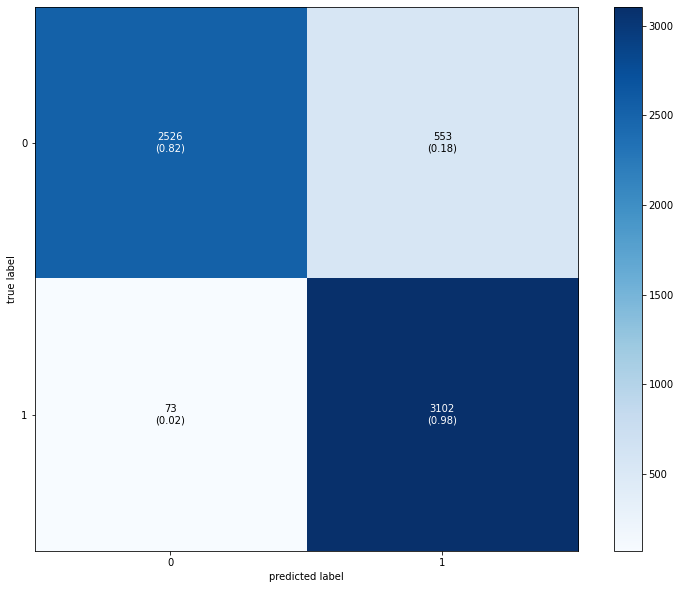

In [42]:
#CreatING KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 3, weights='uniform')
knn.fit(x_train, y_train)
# Predicting dataset response
y_pred = knn.predict(x_test)
# Evaluate and display Training and Testing Acvuracy
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))
confusion_matrix(y_test,y_pred)
# Display Classification Report
print(classification_report(y_test,y_pred))
# Confusion matrix call
ConfusionMatrix(y_test,y_pred)

In [43]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train, y_train)

print ('Best score = ',grid.best_score_)
print ('Best parameters are = ',grid.best_params_)
print ('Best estimator is = ',grid.best_estimator_)

Best score =  0.9152844413982179
Best parameters are =  {'n_neighbors': 2, 'weights': 'distance'}
Best estimator is =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')




> LOGISTIC ***REGRESSION*** 



In [44]:
# Model Training
# logis = LogisticRegression(random_state = 50, max_iter = 5000)
logis=LogisticRegression(random_state = 50, max_iter = 5000,penalty= 'l2', solver= 'newton-cg',C= 10)
# logis=LogisticRegression(random_state = 50, max_iter = 100,penalty= 'l2', solver= 'liblinear',C= 0.000263)
# logis = LogisticRegression()
lr = logis.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [45]:
# Model Evaluation
m = confusion_matrix(y_test,y_pred_lr)
print("Logistic Regression:")
print("Accuracy: ", (m[0][0] + m[1][1]) / (m[0][0] + m[0][1] + m[1][0] + m[1][1]))
print(classification_report(y_test,y_pred_lr))
# print("Testing Accuracy :", logreg.score(x_test, y_test))

Logistic Regression:
Accuracy:  0.8143588103613687
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      3079
           1       0.87      0.74      0.80      3175

    accuracy                           0.81      6254
   macro avg       0.82      0.82      0.81      6254
weighted avg       0.82      0.81      0.81      6254



In [46]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2','l5']
c_values = [10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820859 using {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.820082 (0.007607) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.817798 (0.007147) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820219 (0.007735) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.820813 (0.009623) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.820196 (0.009879) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'saga'}
0.820425 (0.007669) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.817912 (0.007803) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820516 (0.007790) with: {'C': 1.0, 'penalty': 'l2', 



> ***SVM***





In [47]:
svm = SVC(kernel='rbf', C=0.8, gamma= 0.0001, probability=True)
svm.fit(x_train, y_train)
y_pred_SVM = svm.predict(x_test)
yhat = svm.predict(x_train)

In [48]:

np.mean(y_train==yhat)
np.mean(y_test==y_pred_SVM)
svm_cm = confusion_matrix(y_test, y_pred_SVM)
print("SVM Accuracy: ",(svm_cm[0][0] + svm_cm[1][1]) / (svm_cm[0][0] + svm_cm[0][1] + svm_cm[1][0] + svm_cm[1][1]))
print(classification_report(y_test, y_pred_SVM))

SVM Accuracy:  0.8231531819635434
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3079
           1       0.86      0.78      0.82      3175

    accuracy                           0.82      6254
   macro avg       0.83      0.82      0.82      6254
weighted avg       0.83      0.82      0.82      6254



Training Accuracy : 0.8291295407813571
Testing Accuracy : 0.8231531819635434
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3079
           1       0.86      0.78      0.82      3175

    accuracy                           0.82      6254
   macro avg       0.83      0.82      0.82      6254
weighted avg       0.83      0.82      0.82      6254



<Figure size 288x288 with 0 Axes>

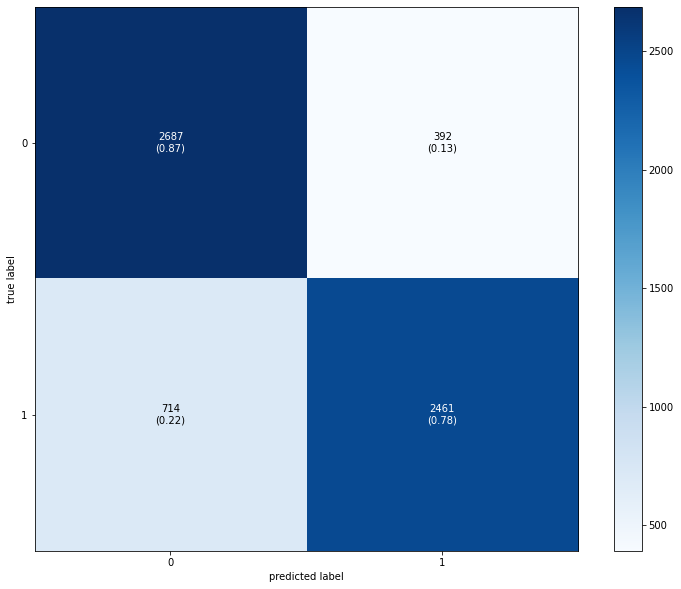

In [49]:
# svclassifier=SVC(kernel='linear') # not so good
svclassifier=SVC(kernel='rbf',C=0.8, gamma= 0.0001, probability=True) # good output
# svclassifier=SVC(kernel='poly') # bad
# svclassifier=SVC(kernel='sigmoid') # worse
svclassifier.fit(x_train,y_train)

y_predict=svclassifier.predict(x_test)

# evaluating the model
print("Training Accuracy :", svclassifier.score(x_train, y_train))
print("Testing Accuracy :", svclassifier.score(x_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))

# confusion matrix
ConfusionMatrix(y_test,y_predict)

# **Conclusion**

In [51]:

model_params = {
    'svm': {
        'model': SVC(kernel='rbf', C=0.8, gamma= 0.0001, probability=True),
        'params' : {
            'C': [1,10,15,20,25],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,15,20]
        }
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]
        }
    }
    
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test,y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dff = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dff

NameError: ignored